In [1]:
import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ[ 'NUMBA_CACHE_DIR' ] = '/tmp/'
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
species= 'human'
min_genes = 300
min_cells = 5
pct_mt = 20
total_counts = 200

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.11.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [3]:
#import datasets
#filepath = '/path/to/dataset/raw'
#os.chdir(filepath)
#os.chdir('./')
#os.chdir('/Volumes/COKETOM/transfer')

In [ ]:
filelist_all = os.listdir("./")

filelist = [x for x in filelist_all if x.endswith("h5")]

In [6]:
adatas = [sc.read_10x_h5(filename) for filename in filelist]
#adatas = [sc.read_10x_mtx(filename,cache=True) for filename in filelist]

... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219617-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219618-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219619-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219620-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219621-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-

In [7]:
adatas_raw = [sc.read_10x_h5(filename) for filename in filelist]
#adatas_raw = [sc.read_10x_mtx(filename,cache=True) for filename in filelist]

... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219617-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219618-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219619-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219620-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-covid19bnt-SRP314557-Subj2049-cell_ranger_SRR14219621-outs-filtered_feature_bc_matrix-matrix.h5ad
... reading from cache file cache/gpfs-gibbs-pi-kleinstein-DARPA-AIM-burhan-external-

In [8]:
for i in range(len(adatas_raw)):
  adatas_raw[i].var_names_make_unique()
  adatas_raw[i].obs['sample'] = os.path.splitext(os.path.basename(filelist[i]))[0]
  adatas_raw[i].obs['species'] = species
  sc.pp.filter_cells(adatas_raw[i], min_genes=0)
  

In [9]:
for i in range(len(adatas)):
  adatas[i].var_names_make_unique()
  adatas[i].obs['sample'] = os.path.splitext(os.path.basename(filelist[i]))[0]
  adatas[i].obs['species'] = species
  if min_genes is not None:
    sc.pp.filter_cells(adatas[i], min_genes=min_genes)
  else: sc.pp.filter_cells(adatas[i], min_genes=400)
  if min_cells is not None:
    sc.pp.filter_genes(adatas[i], min_cells=min_cells)
  else: sc.pp.filter_genes(adatas[i], min_cells=3)

filtered out 310 cells that have less than 300 genes expressed
filtered out 12561 genes that are detected in less than 5 cells
filtered out 221 cells that have less than 300 genes expressed
filtered out 12699 genes that are detected in less than 5 cells
filtered out 350 cells that have less than 300 genes expressed
filtered out 12572 genes that are detected in less than 5 cells
filtered out 213 cells that have less than 300 genes expressed
filtered out 12785 genes that are detected in less than 5 cells
filtered out 325 cells that have less than 300 genes expressed
filtered out 13142 genes that are detected in less than 5 cells
filtered out 233 cells that have less than 300 genes expressed
filtered out 13393 genes that are detected in less than 5 cells
filtered out 237 cells that have less than 300 genes expressed
filtered out 13345 genes that are detected in less than 5 cells
filtered out 334 cells that have less than 300 genes expressed
filtered out 13312 genes that are detected in le

In [10]:
for i in range(len(adatas)):
  adatas[i].var['mt'] = adatas[i].var_names.str.startswith('MT-')
  sc.pp.calculate_qc_metrics(adatas[i], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
  if pct_mt is not None:
    adatas[i] = adatas[i][adatas[i].obs.pct_counts_mt < pct_mt, :]
  else: adatas[i] = adatas[i][adatas[i].obs.pct_counts_mt < 15, :] #do the filtering by slicing the AnnData object.
  if total_counts is not None:
    adatas[i] = adatas[i][adatas[i].obs.total_counts > total_counts, :] 
  else: adatas[i] = adatas[i][adatas[i].obs.total_counts > 200, :]

for i in range(len(adatas_raw)):
  adatas_raw[i].var['mt'] = adatas_raw[i].var_names.str.startswith('MT-')
  sc.pp.calculate_qc_metrics(adatas_raw[i], qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [11]:
adatas

[View of AnnData object with n_obs × n_vars = 6391 × 24040
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 5533 × 23902
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 6695 × 24029
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 View of AnnData object with n_obs × n_vars = 7078 × 23816
     obs: 'sample', 'sp

In [12]:
adatas_raw

[AnnData object with n_obs × n_vars = 6994 × 36601
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 5909 × 36601
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 7231 × 36601
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts',
 AnnData object with n_obs × n_vars = 7421 × 36601
     obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_co

In [13]:
adatas_concat = ad.concat([adatas[i] for i in range(len(adatas))], merge="same")
adatas_concatraw = ad.concat([adatas_raw[i] for i in range(len(adatas_raw))], merge="same")

/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1818: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [14]:
adatas_concat

AnnData object with n_obs × n_vars = 47029 × 21276
    obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt'

In [15]:
adatas_concatraw

AnnData object with n_obs × n_vars = 50527 × 36601
    obs: 'sample', 'species', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt'

#### Cell counts bar plot for each sample before and after filter

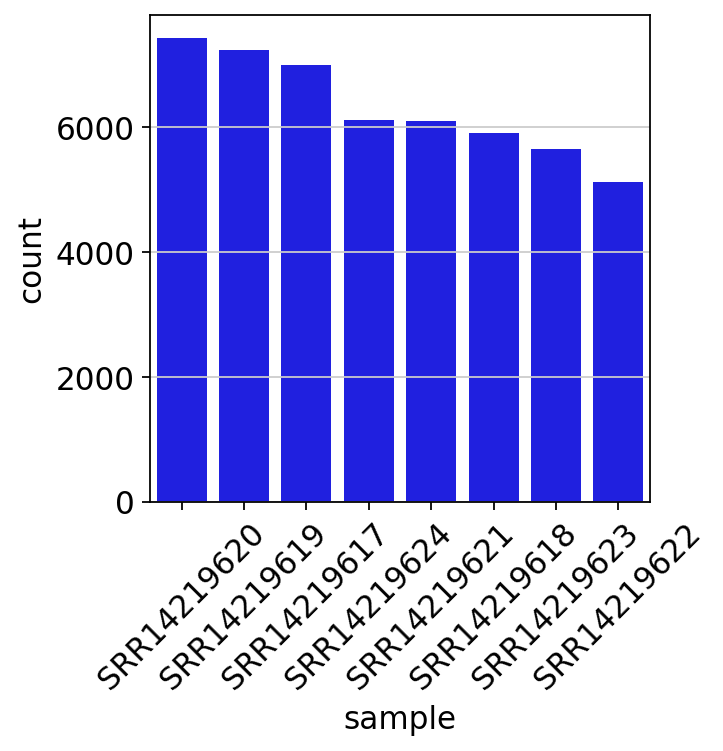

In [16]:
s = adatas_concatraw.obs["sample"].value_counts()
s = s.to_frame().reset_index()
ax=sns.barplot(s, x = 'sample',y = 'count',color='blue') #before filter
ax.tick_params(axis='x', labelrotation=45)

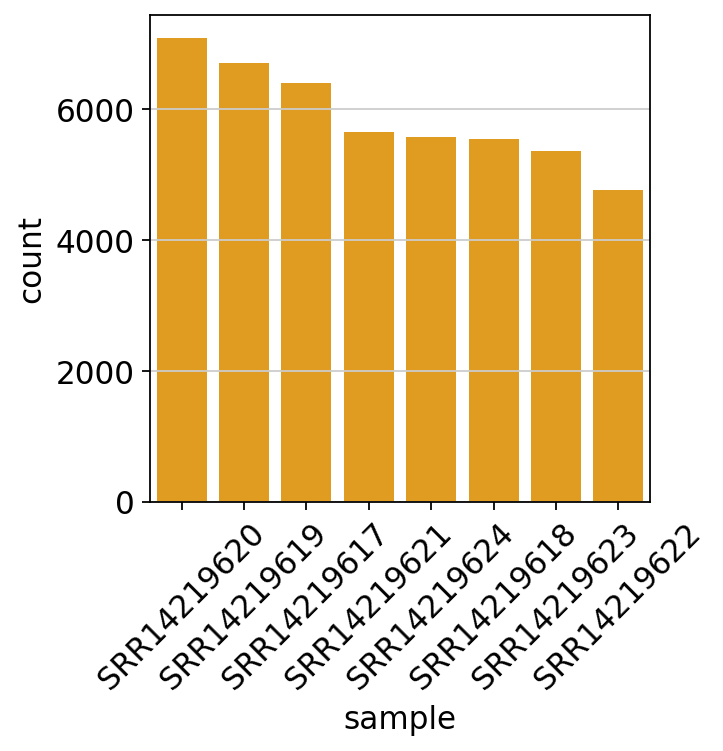

In [17]:
s = adatas_concat.obs["sample"].value_counts()
s = s.to_frame().reset_index()
ax = sns.barplot(s, x = 'sample',y = 'count',color='orange') #after filter
ax.tick_params(axis='x', labelrotation=45)

#### Number of read counts per cell vs percentage mt genes before and after filter

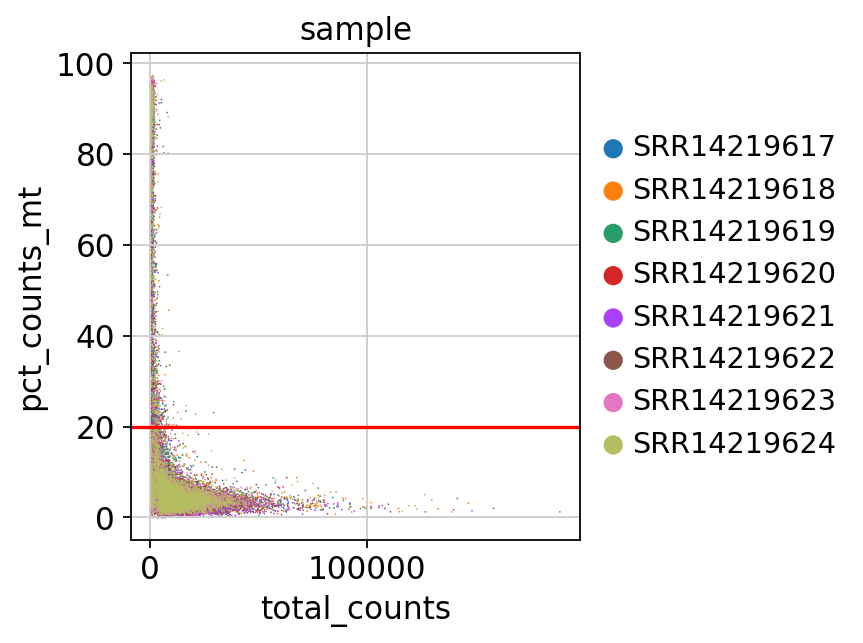

In [18]:
ax = sc.pl.scatter(adatas_concatraw, x="total_counts", y="pct_counts_mt", color="sample",show=False)
if pct_mt is not None:
  ax.axhline(y=pct_mt,color = "r")
else: ax.axhline(y=15, color = "r")

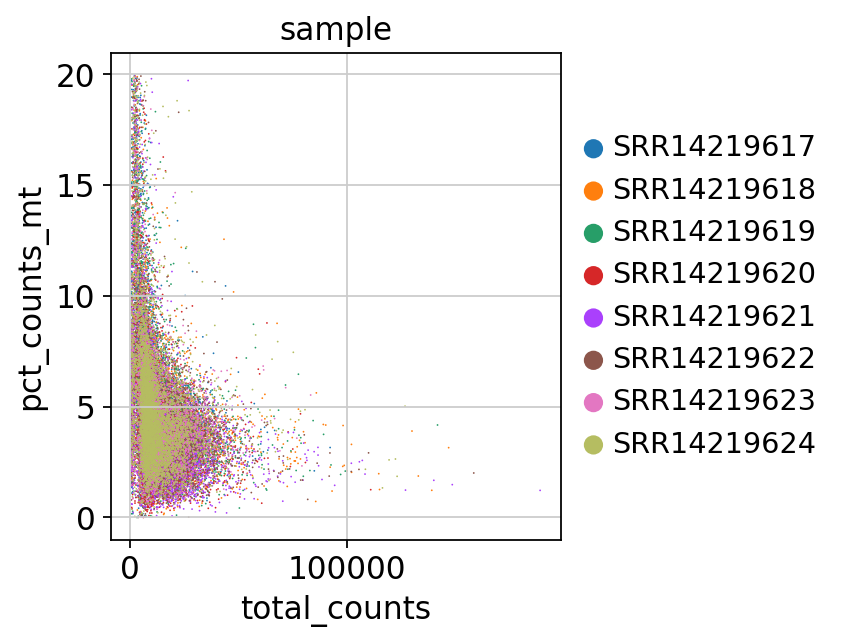

In [19]:
sc.pl.scatter(adatas_concat, x="total_counts", y="pct_counts_mt", color="sample")

### Number of features (genes) per cell vs read counts before and after filter

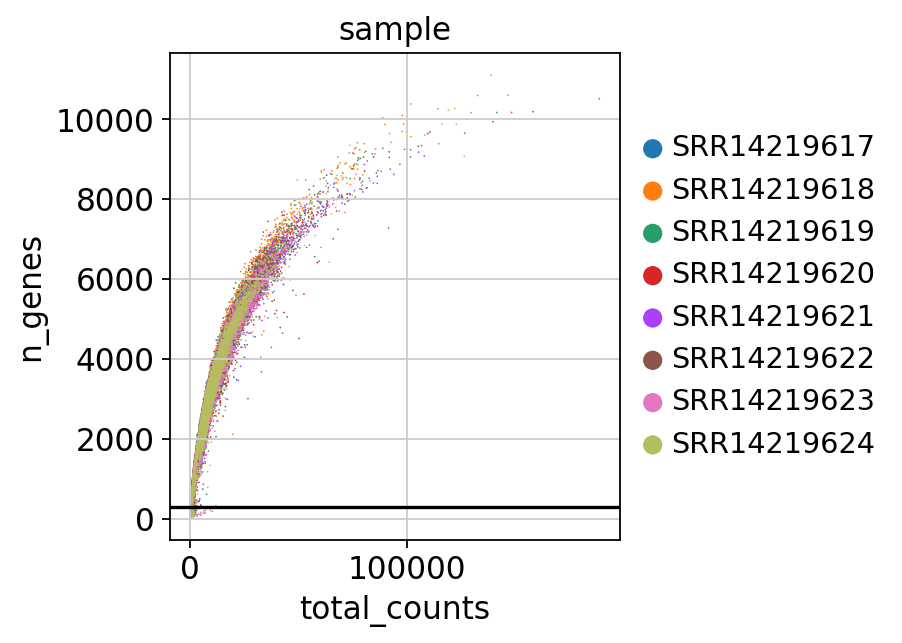

In [20]:
ax = sc.pl.scatter(adatas_concatraw, x="total_counts", y="n_genes", color="sample",show=False)
if pct_mt is not None:
  ax.axhline(y=min_genes,color = "black")
else: ax.axhline(y=200, color = "black")

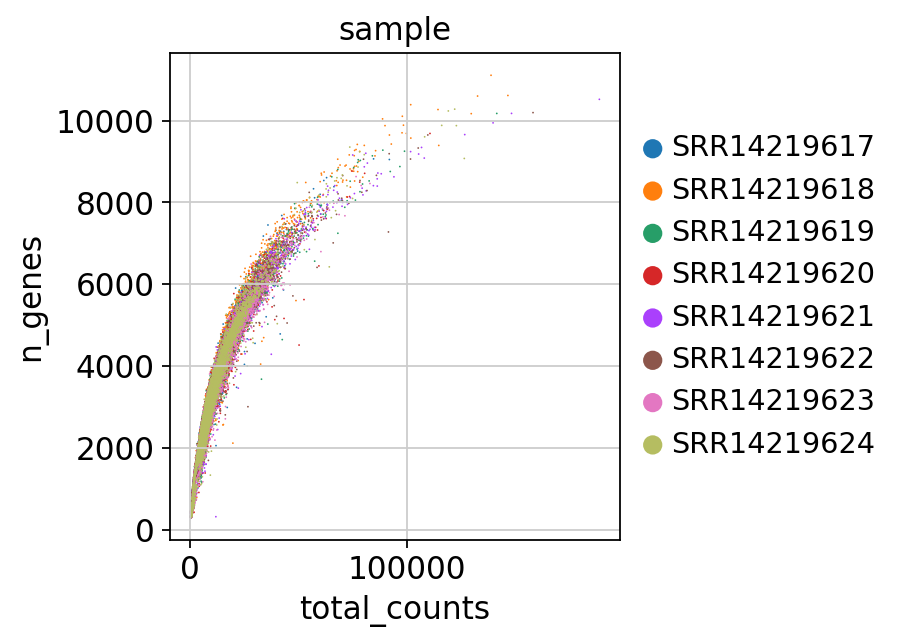

In [21]:
ax = sc.pl.scatter(adatas_concat, x="total_counts", y="n_genes", color="sample",show=False)

### Number of features (genes) per cell vs percentage mt genes before and after filter

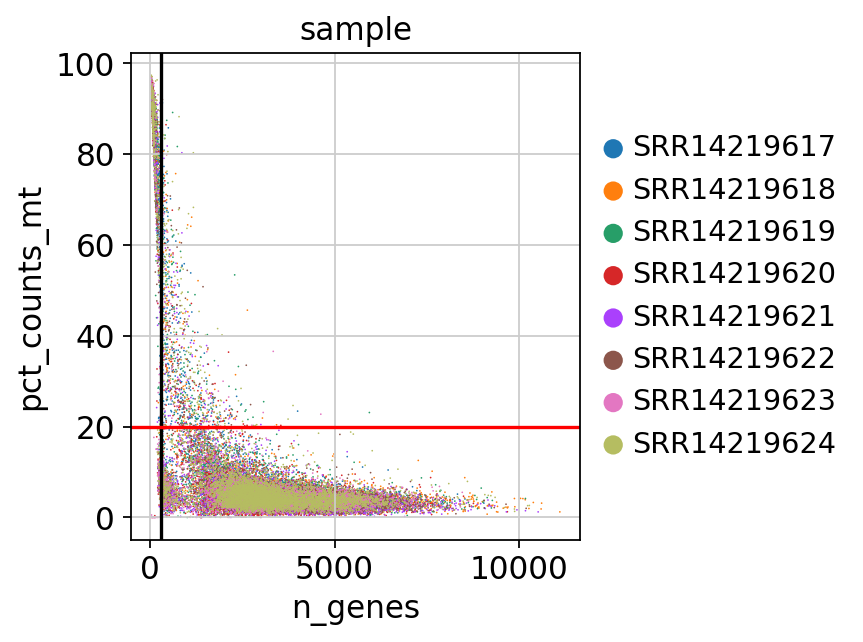

In [22]:
ax = sc.pl.scatter(adatas_concatraw, x="n_genes", y="pct_counts_mt", color="sample",show=False)
if min_genes is not None:
  ax.axvline(x=min_genes,color = "black")
else: ax.axvline(x=200, color = "black")
if pct_mt is not None:
  ax.axhline(y=pct_mt,color = "red")
else: ax.axhline(y=15, color = "red")


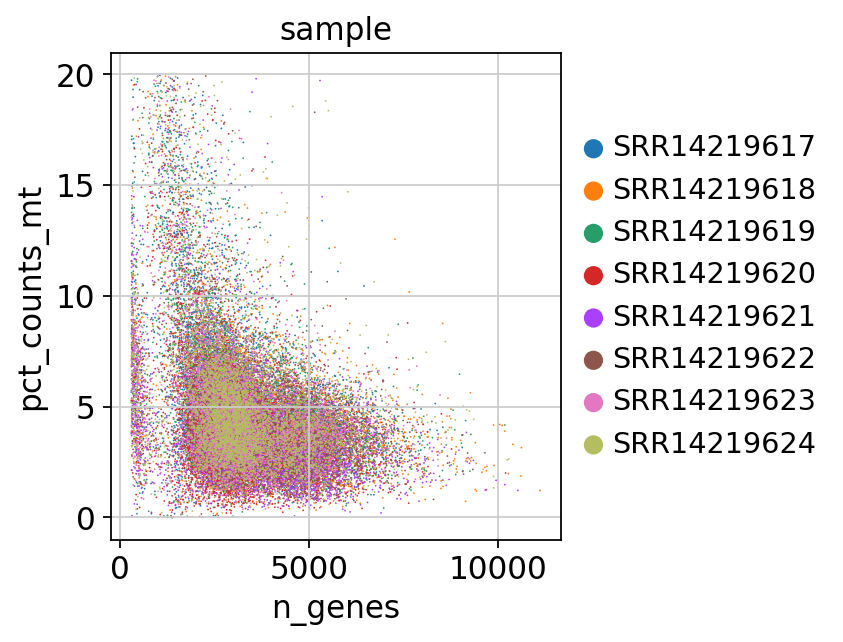

In [28]:
ax = sc.pl.scatter(adatas_concat, x="n_genes", y="pct_counts_mt", color="sample",show=False)

#### Voilin plot for number of genes before and after filter

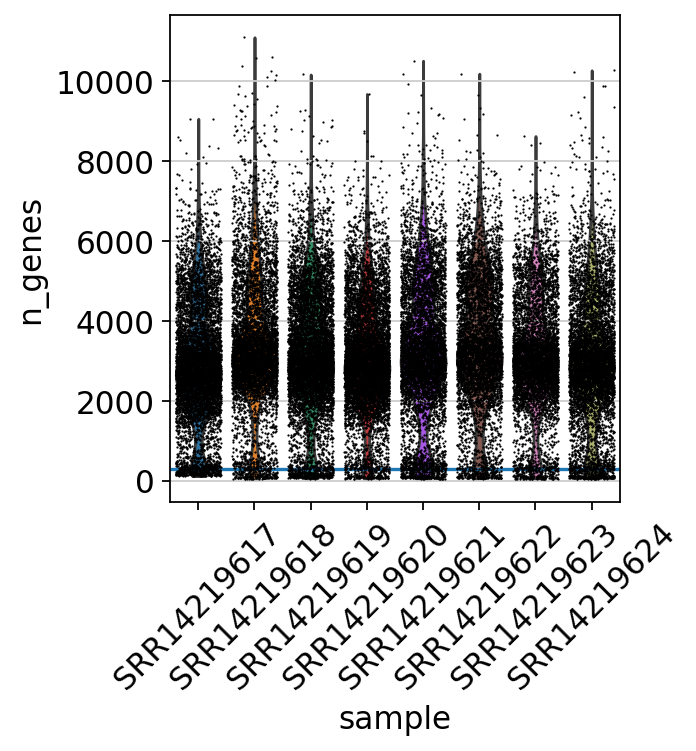

In [24]:
ax = sc.pl.violin(adatas_concatraw, ['n_genes'], groupby = 'sample',
             jitter=0.4, multi_panel=True, show=False)
ax.tick_params(axis='x', labelrotation=45)
if min_genes is not None:
  ax.axhline(y=min_genes)
else: ax.axhline(y=200)

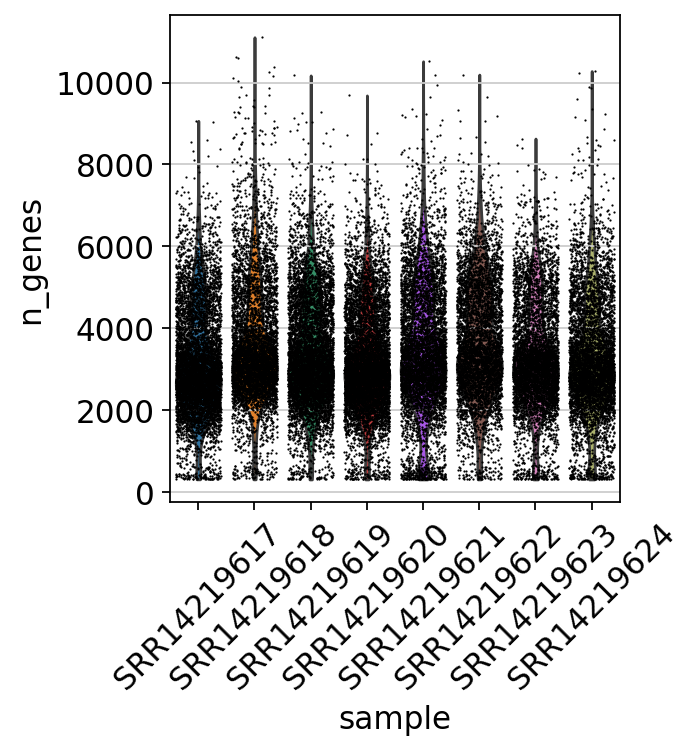

In [25]:
ax = sc.pl.violin(adatas_concat, ['n_genes'], groupby = 'sample',
             jitter=0.4, multi_panel=True, show=False)
ax.tick_params(axis='x', labelrotation=45)

#### Voilin plot for percentage of mt genes before and after filter

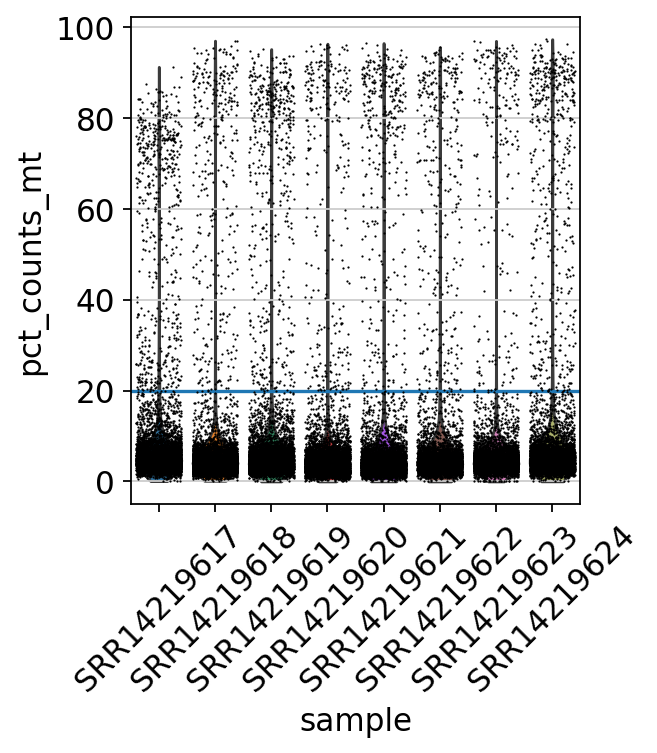

In [26]:
ax = sc.pl.violin(adatas_concatraw, ['pct_counts_mt'], groupby = 'sample',
             jitter=0.4, multi_panel=True, show=False)
ax.tick_params(axis='x', labelrotation=45)
if pct_mt is not None:
  ax.axhline(y=pct_mt)
else: ax.axhline(y=15)

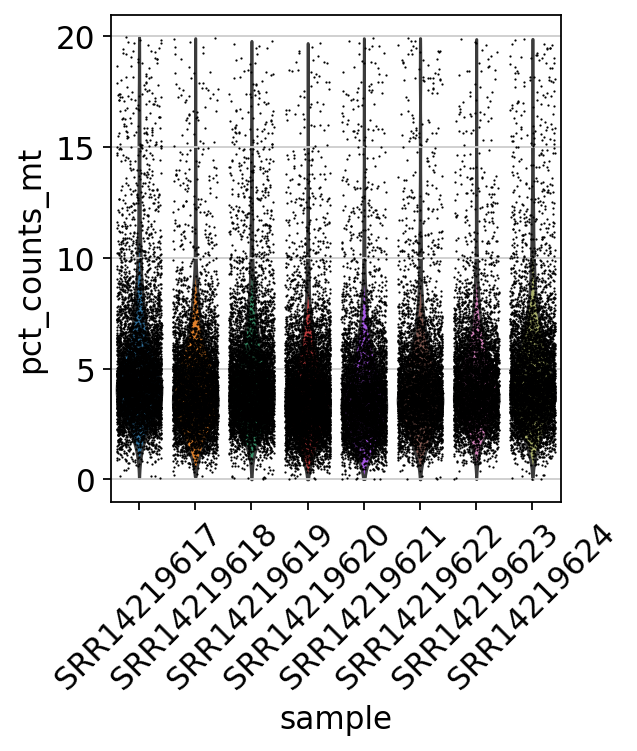

In [27]:
ax = sc.pl.violin(adatas_concat, ['pct_counts_mt'], groupby = 'sample',
             jitter=0.4, multi_panel=True,show=False)
ax.tick_params(axis='x', labelrotation=45)

#### Save h5ad files

In [34]:
for i in range(len(adatas)):
  #adatas[i].write(str(SRR[i])+'.h5ad')
  adatas[i].write(os.path.splitext(os.path.basename(filelist[i]))[0]+'.h5ad')


/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/jx299/.conda/envs/py/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df